# Stock Market Price Prediction Using Linear Regression




## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
import seaborn as sns
from pandas_profiling import ProfileReport
import mplfinance as mpf

%matplotlib inline
plt.rcParams["figure.figsize"] = (20,10)

## Loading the Data

In [2]:
df =pd.read_csv('tatamoters.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4093 entries, 0 to 4092
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       4093 non-null   object 
 1   Open Price                 4093 non-null   float64
 2   High Price                 4093 non-null   float64
 3   Low Price                  4093 non-null   float64
 4   Close Price                4093 non-null   float64
 5   WAP                        4093 non-null   float64
 6   No.of Shares               4093 non-null   int64  
 7   No. of Trades              4093 non-null   int64  
 8   Total Turnover (Rs.)       4093 non-null   float64
 9   Deliverable Quantity       4087 non-null   float64
 10  % Deli. Qty to Traded Qty  4087 non-null   float64
 11  Spread High-Low            4093 non-null   float64
 12  Spread Close-Open          4093 non-null   float64
dtypes: float64(10), int64(2), object(1)
memory usage

## Data Preprocessing

In [3]:
df.Date=pd.to_datetime(df.Date)
df.set_index('Date',inplace=True)
df.head()

,Open Price,High Price,Low Price,Close Price,WAP,No.of Shares,No. of Trades,Total Turnover (Rs.),Deliverable Quantity,% Deli. Qty to Traded Qty,Spread High-Low,Spread Close-Open
Date,,,,,,,,,,,,
2021-07-02,345.90,345.9,340.6,344.85,343.462667,772457,8998,265310141.0,101610.0,13.15,5.3,-1.05
2021-07-01,341.65,347.5,341.3,344.20,344.472225,1364768,13760,470124669.0,177383.0,13.00,6.2,2.55
2021-06-30,342.00,345.2,338.8,339.55,342.590426,1039566,9919,356145359.0,156898.0,15.09,6.4,-2.45
2021-06-29,344.40,346.5,339.6,341.55,343.421828,1780699,21863,611530906.0,406923.0,22.85,6.9,-2.85
2021-06-28,340.80,344.9,337.5,342.90,340.585064,999967,11993,340573825.0,127959.0,12.80,7.4,2.10


In [4]:
df=df.iloc[::-1]
df['Target']=df['Close Price'].shift(periods=-1)
df.head()

,Open Price,High Price,Low Price,Close Price,WAP,No.of Shares,No. of Trades,Total Turnover (Rs.),Deliverable Quantity,% Deli. Qty to Traded Qty,Spread High-Low,Spread Close-Open,Target
Date,,,,,,,,,,,,,
2005-01-03,509.75,523.0,509.00,520.10,517.105053,1272288,10861,657906554.0,293069.0,23.03,14.00,10.35,519.80
2005-01-04,521.35,526.0,518.05,519.80,521.435174,612311,6314,319280493.0,62442.0,10.20,7.95,-1.55,503.65
2005-01-05,515.00,520.0,475.00,503.65,500.729362,1721481,14085,861996082.0,277604.0,16.13,45.00,-11.35,495.25
2005-01-06,505.00,509.5,491.20,495.25,499.941709,1572000,12843,785908366.0,390932.0,24.87,18.30,-9.75,493.25
2005-01-07,493.00,497.9,487.00,493.25,492.711529,651909,8233,321203080.0,59164.0,9.08,10.90,0.25,475.10


## Data Visualisation


#### Price Movement from the Data

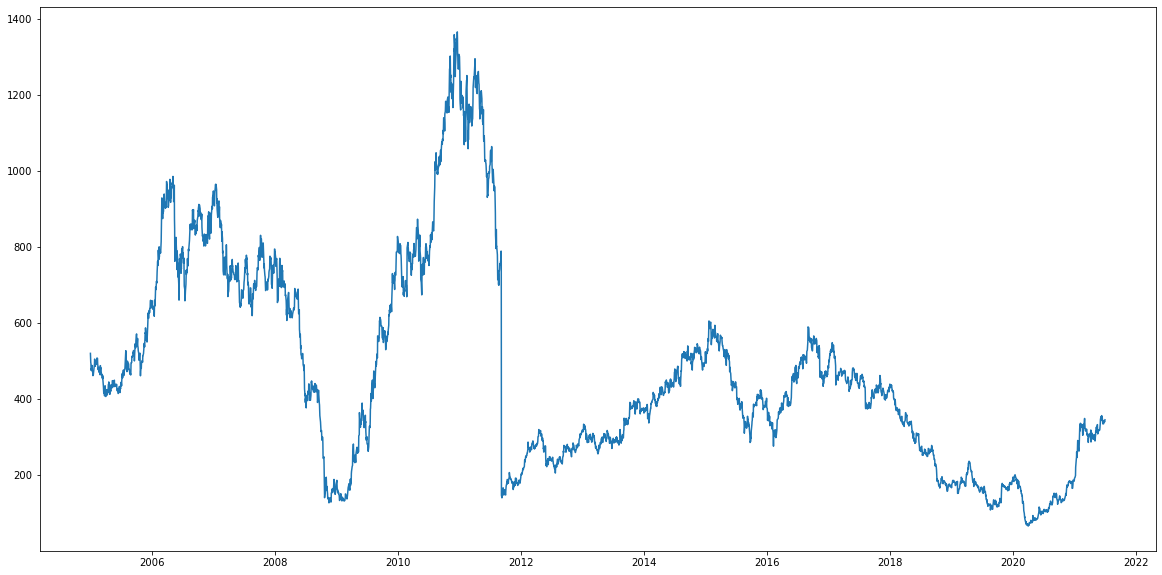

In [5]:
plt.plot(df.index,df['Target'])

#### Candlestick Chart of last 10 sessions

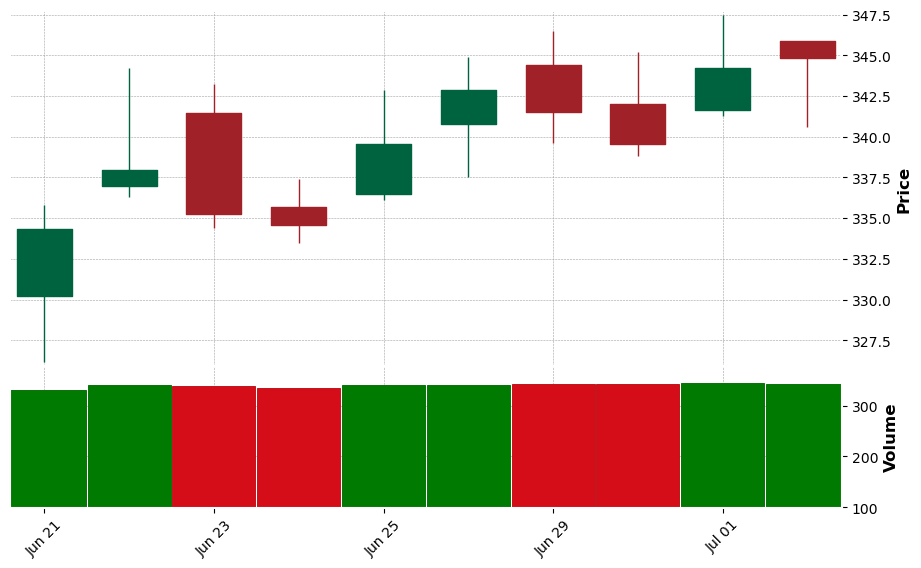

In [6]:
df.columns=['Open', 'High', 'Low', 'Close', 'Volume',
       'No.of Shares', 'No. of Trades', 'Total Turnover (Rs.)',
       'Deliverable Quantity', '% Deli. Qty to Traded Qty', 'Spread High-Low',
       'Spread Close-Open','Target']

mpf.plot(df.tail(10),type='candle',volume=True,tight_layout=True,figratio=(20,12),title='',style='charles')

## Report about the data

In [7]:
profile=ProfileReport(df.drop('Target',axis='columns'),title="olhc Report",explorative=True)

In [8]:
profile.to_widgets()

Summarize dataset:   0%|          | 0/26 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

### Data Cleaning

In [9]:
print(df.shape)
df_m=df
df_m=df_m.dropna()
df_m.shape

(4093, 13)


(4086, 13)

## Splitting the data

In [10]:
x_train,x_test,y_train,y_test=train_test_split(df_m.drop(['Target'],axis='columns'),df_m['Target'],test_size=0.3)

## Initialisation and Fitting the Model

In [11]:
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

## Evaluvation of Model



### Accuracy

In [12]:
model.score(x_test,y_test)

0.9981149833111852

### Root Mean Sqarued Error

In [13]:
pred_y=model.predict(x_test)
mean_squared_error(y_test,pred_y,squared=False)

12.109970469256266

### Mean Sqaured Error

In [14]:
mean_squared_error(y_test,pred_y)

146.65138476625884

### Mean absolute Error

In [15]:
mean_absolute_error(y_test,pred_y)

8.284968603025778

## Visualisation of Model




### Linear Regression Plot

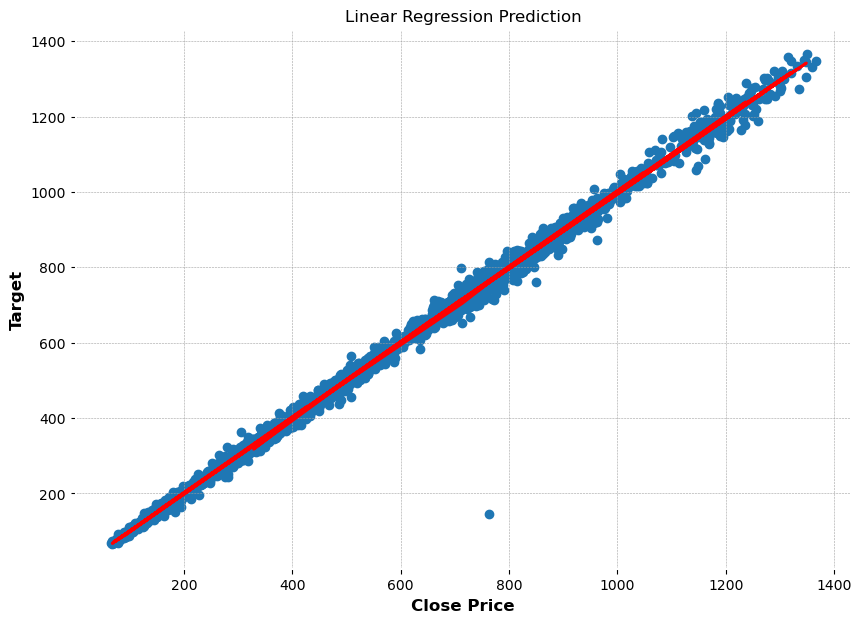

In [16]:
# Plot outputs
plt.figure(figsize=(10,7))
plt.scatter(x=df['Close'], y=df['Target'])
plt.plot(x_test['Close'], model.predict(x_test), color='red')
plt.xlabel('Close Price')
plt.ylabel('Target')
plt.title('Linear Regression Prediction')
plt.show()

### Plot of difference of True values and Predicted Values

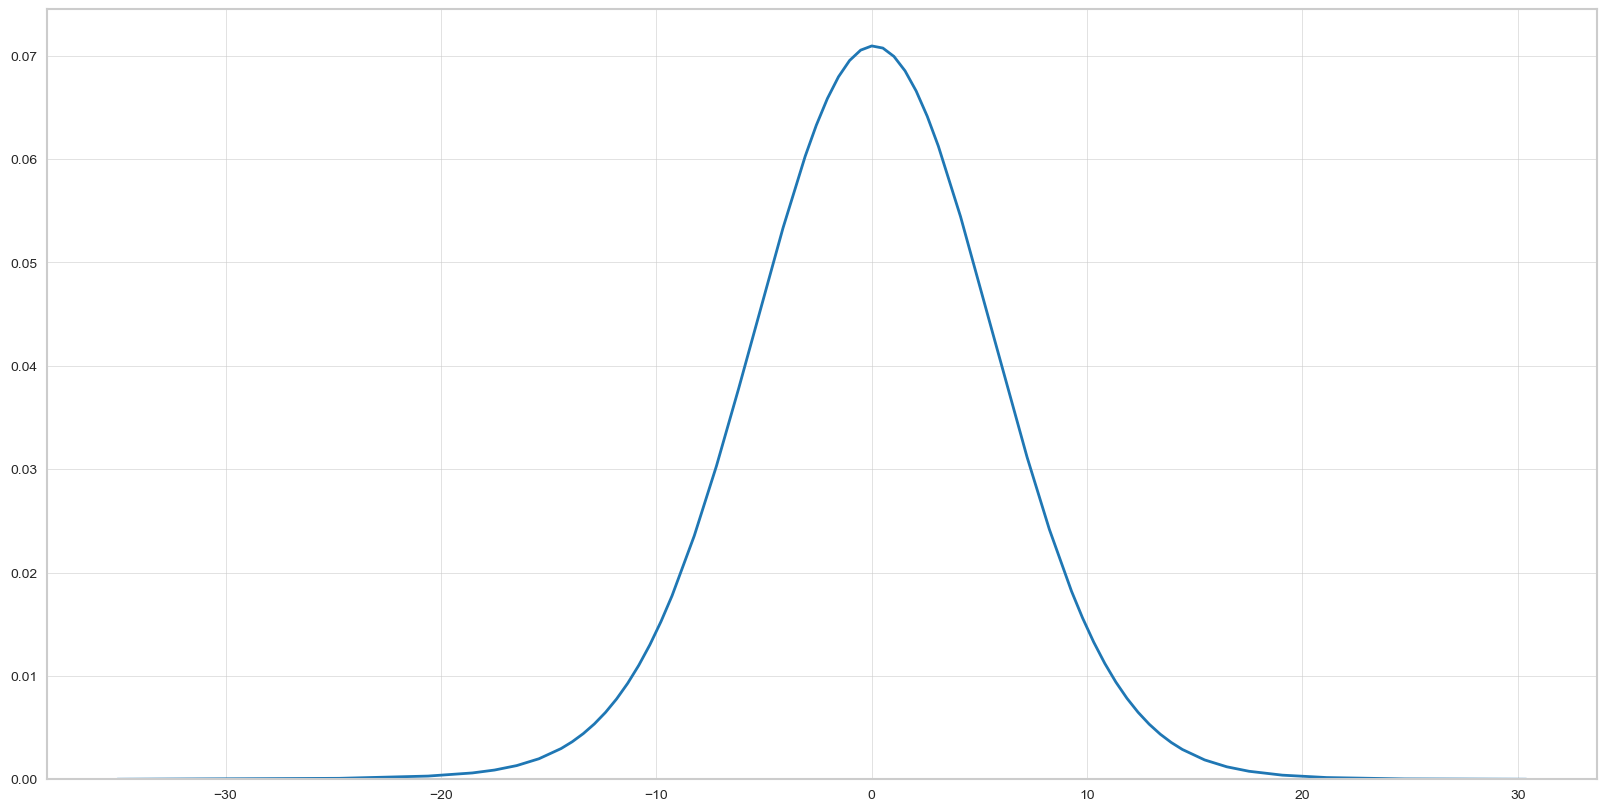

In [17]:
plt.rcParams["figure.figsize"] = (20,10)
#Error Percentage of Each prediction
delta_y = (y_test-pred_y)/y_test*100
sns.set_style('whitegrid')
sns.kdeplot(np.array(delta_y),bw=5)
plt.show()

### Plotting the Predicted Values

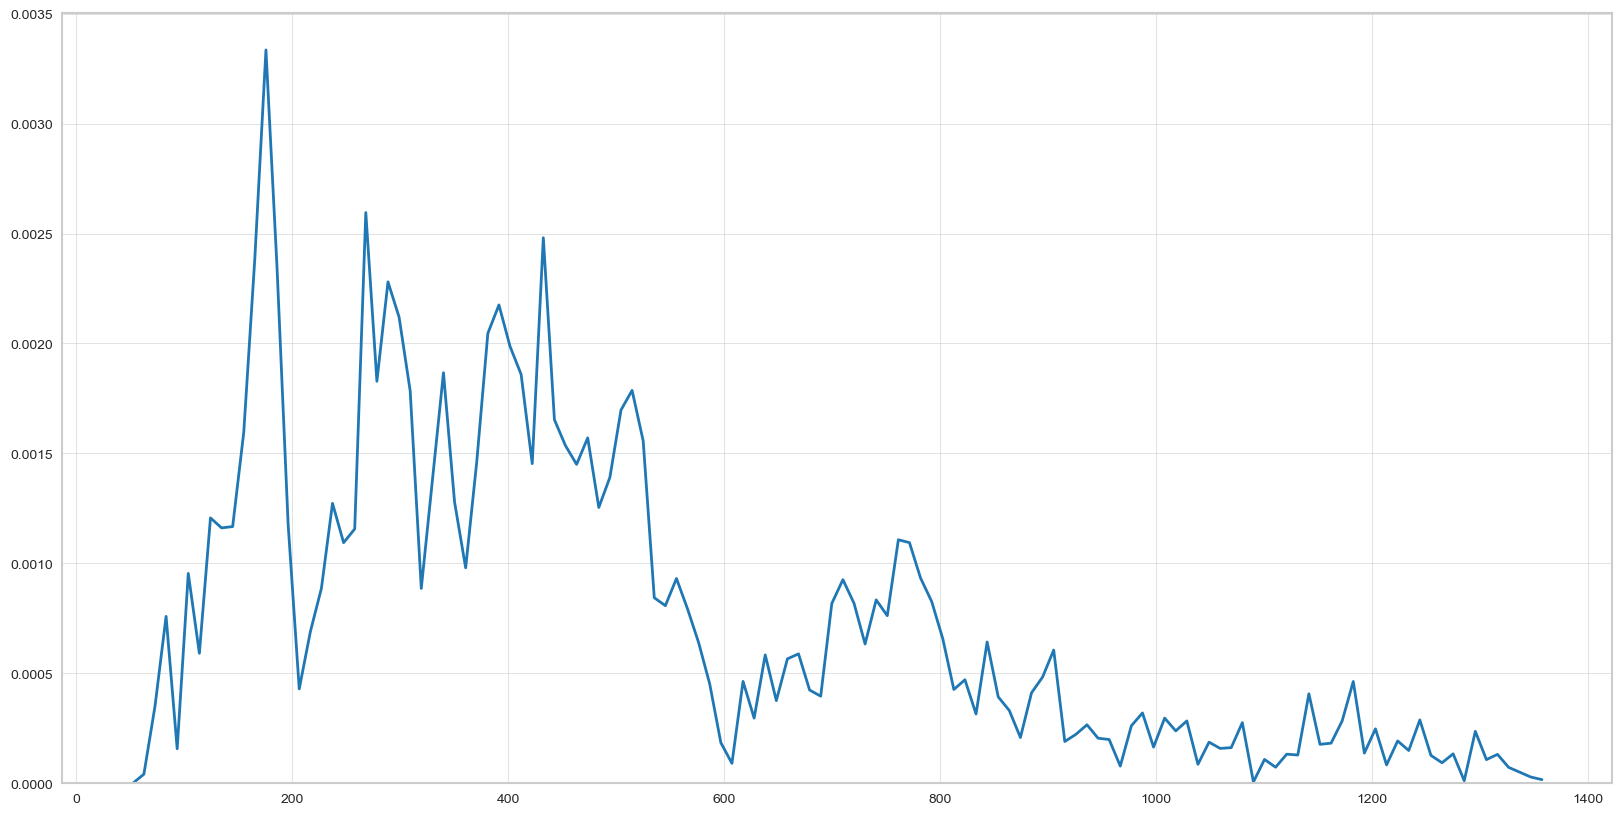

In [18]:
sns.set_style('whitegrid')
sns.kdeplot(np.array(pred_y), bw=5)
plt.show()

### Plotting the True Values

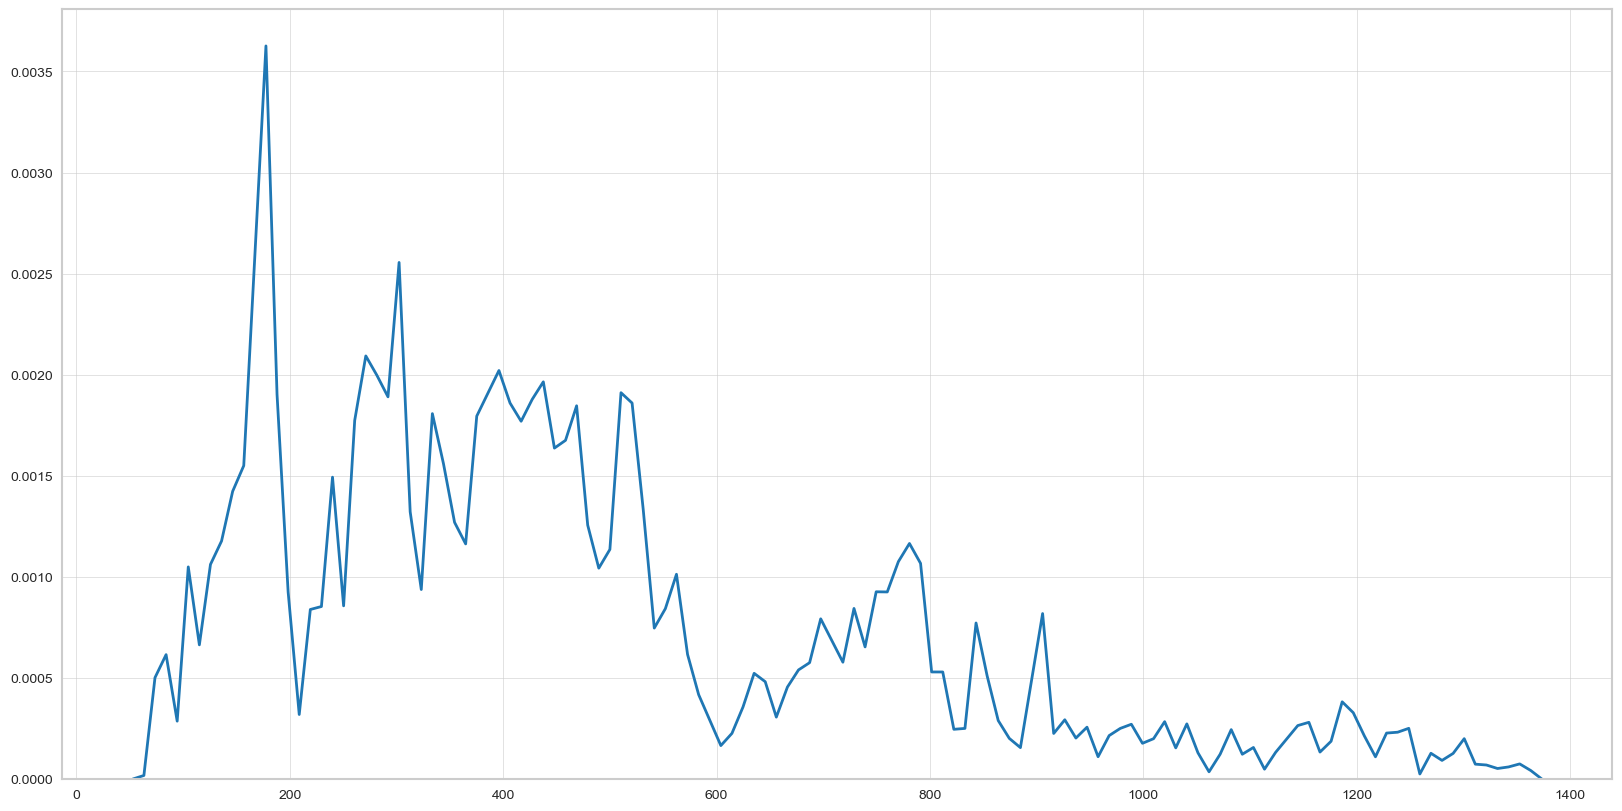

In [19]:
sns.set_style('whitegrid')
sns.kdeplot(np.array(y_test), bw=5)
plt.show()

### Predicted Values vs True Values

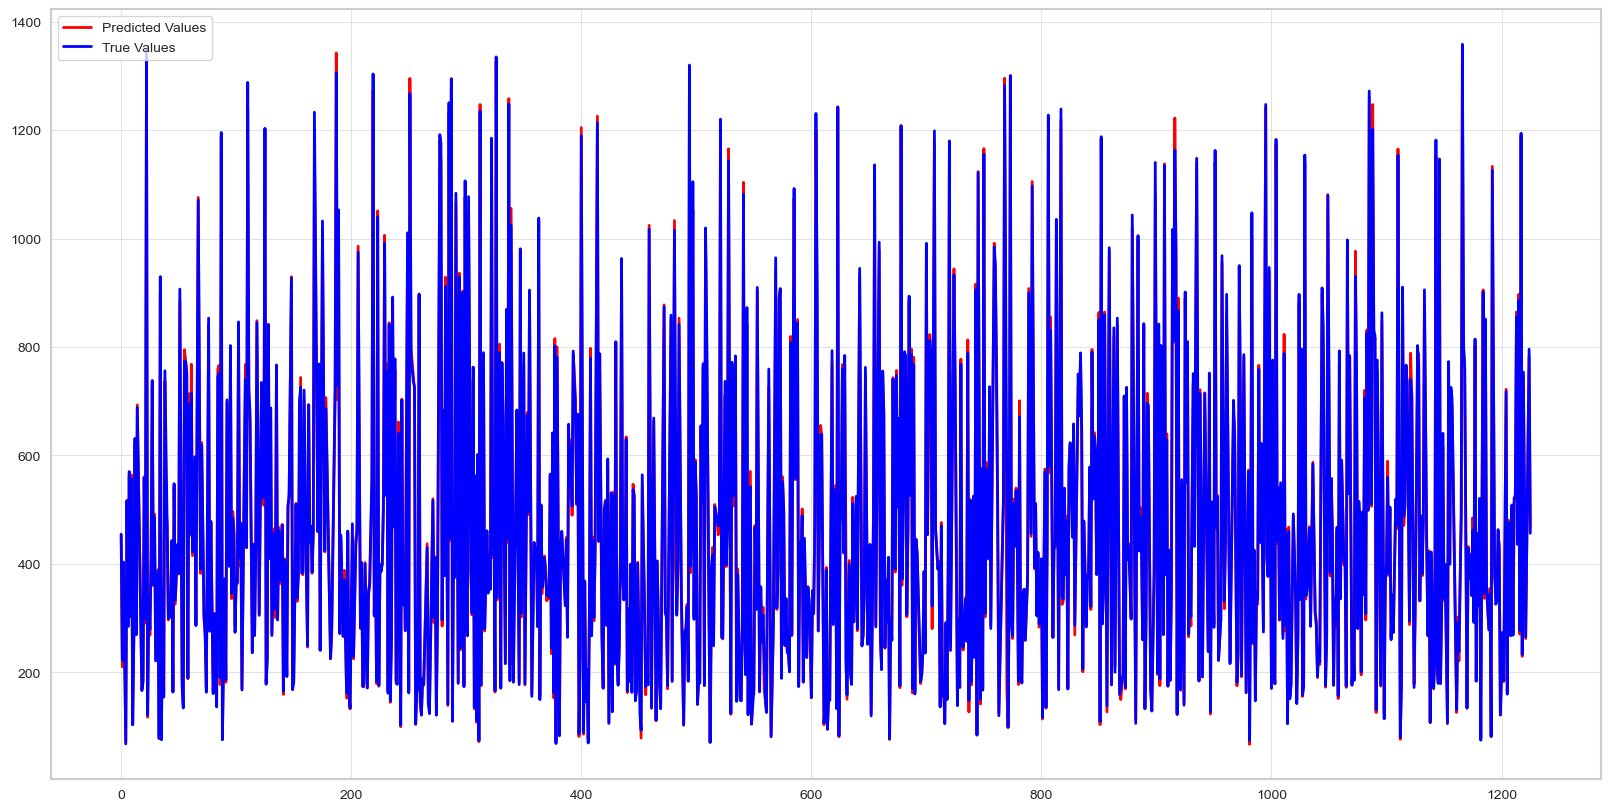

In [20]:
plt.plot(pred_y,color='red', label='Predicted Values')
plt.plot(list(y_test),color='blue', label='True Values')
plt.legend(loc='upper left')
plt.show()

### Root Mean Squared Error of Training and Testing data




A model that is underfit will have high training and high testing error while an overfit model will have extremely low training error but a high testing error.

<BarContainer object of 2 artists>

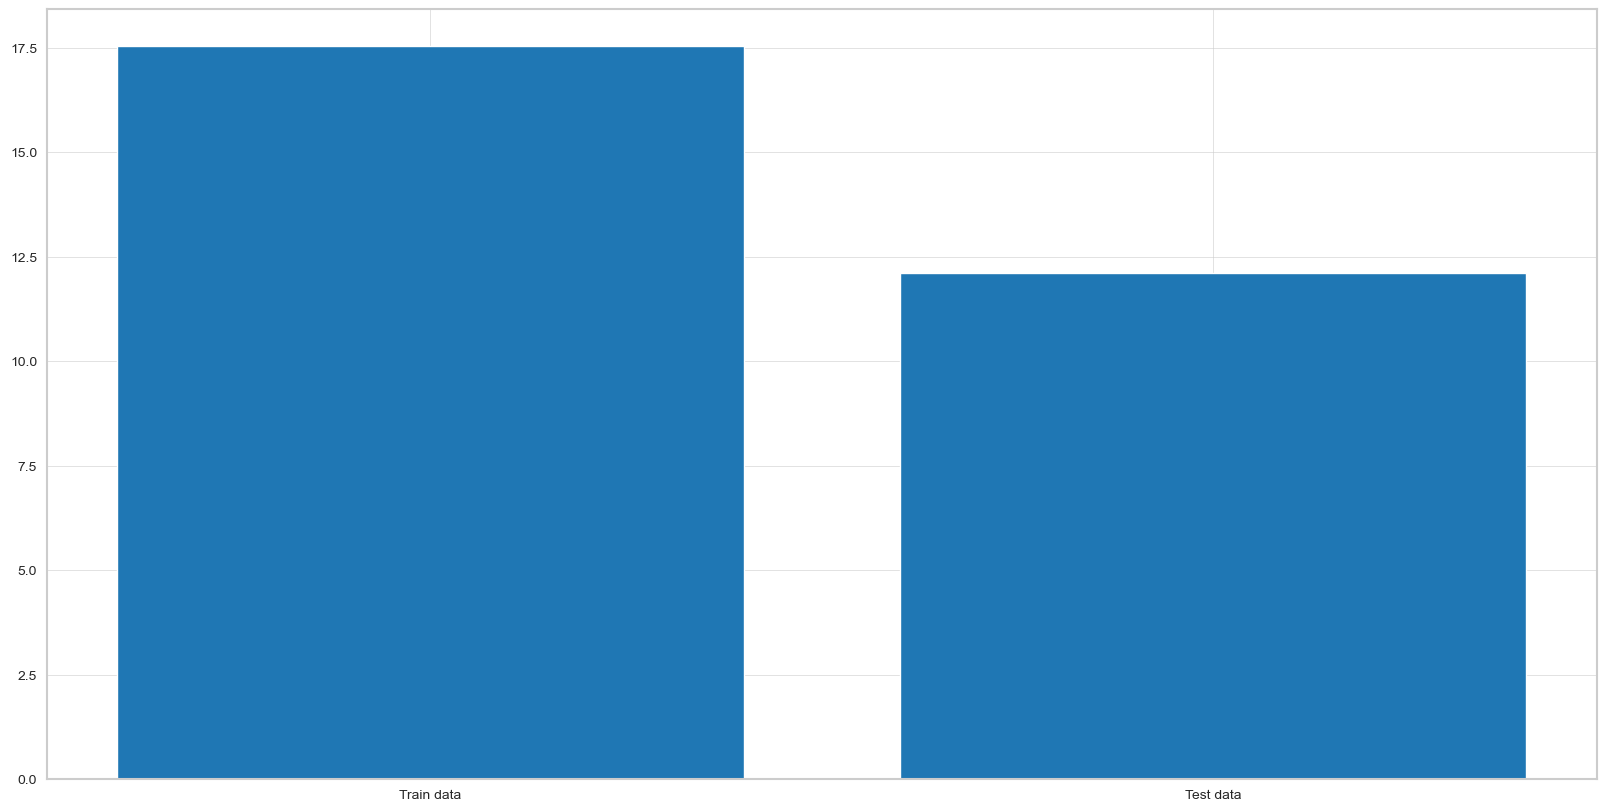

In [21]:
train_e=mean_squared_error(y_train,model.predict(x_train),squared=False)
test_e=mean_squared_error(y_test,pred_y,squared=False)
plt.bar(('Train data','Test data'),(train_e,test_e))

In [22]:
s_train=model.score(x_train,y_train)
s_test=model.score(x_test,y_test)

<BarContainer object of 2 artists>

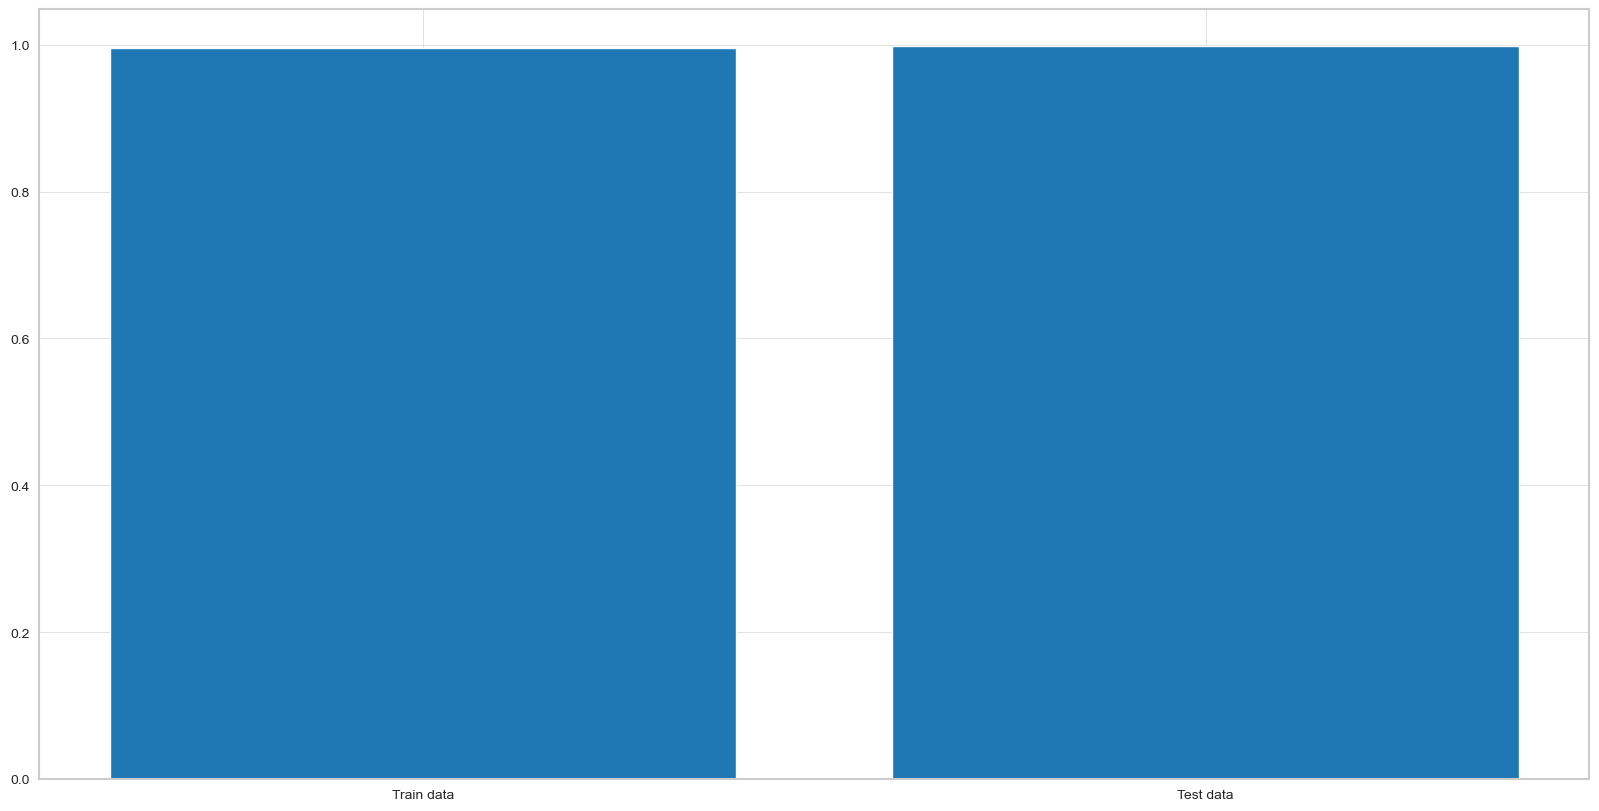

In [23]:
train_e=mean_squared_error(y_train,model.predict(x_train),squared=False)
test_e=mean_squared_error(y_test,pred_y,squared=False)
plt.bar(('Train data','Test data'),(s_train,s_test))

In [25]:
#Real Time Prediction for Today
model.predict([[345.90,345.90,340.60,344.85,343.462666530305246764,772457,8998,265310141.00,101610,13.15,5.30,-1.05]])

array([344.80261159])

### Thank You